# Survival Analysis: Non-Smokers vs. Smokers

In [1]:
from data.create_data import *
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

%matplotlib inline

### Research Questions
  1. What is the overall survival rate of patients in the Framingham study?
  2. Is there a difference in survival rates between non-smokers and smokers?
  
## Survival Analysis of the Framingham Population
Perform survival analysis of the Framingham population. 

#### Duration (T/`t`)
The duration of the analysis is the number of days from the Baseline exam (`timedth`). 

**Note**: 8100 events are *censored* (lifetimes are unknown as the respondents are still alive at the end of  the study). The censored events have a censor time of 8766 days (end of study). The time of death may have occurred after some known date (end of study).

#### Observed Event (E)
The observed event is death, whether or not the Framingham respondent survived.

### Considerations: Estimation of Survival and Hazard Functions
In real-world scenarios, the distribution (cumulative distribution functions) of lifetimes are not measured directly. Not all respondents have passed and those that survive have unknown lifetimes. Thus, the computation of the survival curve involves that the missing (*censored*) information be *inferred* or estimated.

It is not feasible to always wait for the complete dataset with complete lifetimes to perform survival analysis. For example, the evaluation of the efficacy of a new treatment would require earlier computation with such incomplete information.

In [2]:
data = read_frmgham()
data['death'].value_counts()

0    8100
1    3527
Name: death, dtype: int64

There are 11,627 total "events" and 8,100 of these events are alive (**right-censored**). Thus, the estimation of the survival curves involves approximately 8,100 missing data points.

### Survival Curve (`S(t)`)
The survival curve is the probability that the event (death) has not occurred yet at time (`t`). More equivalently, it's the probability of surviving until at least time (`t`).

The survival function maps the probability of surviving longer than `t` to the duration/time (`t`).

In [3]:
kmf = KaplanMeierFitter()
kmf.fit(data['timedth'], event_observed=data['death'])

<lifelines.KaplanMeierFitter: fitted with 11627 observations, 8100 censored>

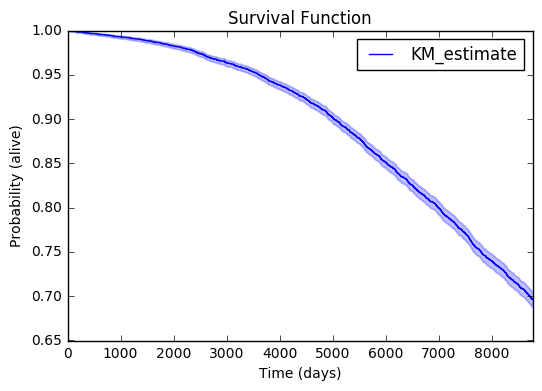

In [4]:
kmf.plot(title='Survival Function')
plt.xlabel('Time (days)')
plt.ylabel('Probability (alive)')
plt.show()

#### Conclusions
The y-axis represents the probability of the event (death) not occurring at time (`t`). For example at time, t = 7000 days since the Baseline Exam, there is a 80% probability that the patient does not die and survives past this duration (event does not occur).

The survival curve begans to drastically drop after 4000 days since the Baseline exam (`t=4000 days`), where the probability of surviving drops from approximately 0.95 to 0.75 (`t=8000 days`).

### Cumulative Hazard Rate (`λ(t)`)
The Hazard Function determines the probability of the event (death) happening in the next instant, after time (`t`). It maps time `t` to the fraction of people alive until that time and pass at that instance.

In [5]:
naf = NelsonAalenFitter()
naf.fit(data['timedth'], event_observed=data['death'])

<lifelines.NelsonAalenFitter: fitted with 11627 observations, 8100 censored>

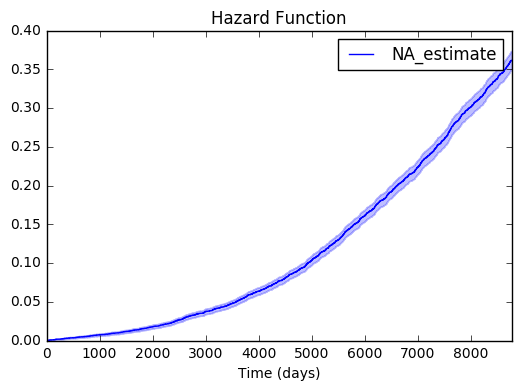

In [6]:
naf.plot(title='Hazard Function')
plt.xlabel('Time (days)')
plt.show()

#### Conclusions
The rate of the onset of the event (death) drastically increases at around 5000 days since the Baseline exam (`t=5000`). At that point in time, the hazard rate is 0.10, which means that the point in time there is a probability of 10% chance of the event (death) occurring for the population. This is complementary to the survival function (`S(t)`) of 0.90 at time 5000 days since the Baseline exam.

In other words, at t=5000 days, approximately 0.10 of the population  will pass at this instance and are unable to survive past this time point.

## Estimation: Cohort Effect (Smokers versus Non-Smokers)
Determine if there is a *statistically significant* difference in the survival rates between the current smoking and non-smoking groups/cohorts.

### Cohorts (`cursmoke`)
  * **`0`**: Non-Smokers
  * **`1`**: Smokers 

In [7]:
non = data[data['cursmoke']==0]
smkr = data[data['cursmoke']==1]

non.shape, smkr.shape

((6598, 39), (5029, 39))

In [8]:
print "Non-Smokers:"
print non['death'].value_counts()
print
print "Smokers:"
print smkr['death'].value_counts()

Non-Smokers:
0    4668
1    1930
Name: death, dtype: int64

Smokers:
0    3432
1    1597
Name: death, dtype: int64


##### Non-Smokers Cohort
6,598 total events. 4,668 of these observations are alive (**right-censored**) and thus their time of "death" and lifetimes are unknown.

##### Diploid Cohort (Type 2 DNA)
5,029 total events. 3,432 of these observations are alive (**right-censored**) and thus their time of "death" and lifetimes are unknown.

### Survival Curve (`S(t)`)
Probability that the event (death) has not occurred yet at time (`t`), in which the respondent will survive until at least this time point.

In [9]:
non_kmf = KaplanMeierFitter()
non_kmf.fit(non['timedth'], event_observed=non['death'], label=['Non-Smokers'])

<lifelines.KaplanMeierFitter: fitted with 6598 observations, 4668 censored>

In [10]:
smkr_kmf = KaplanMeierFitter()
smkr_kmf.fit(smkr['timedth'], event_observed=smkr['death'], label=['Smokers'])

<lifelines.KaplanMeierFitter: fitted with 5029 observations, 3432 censored>

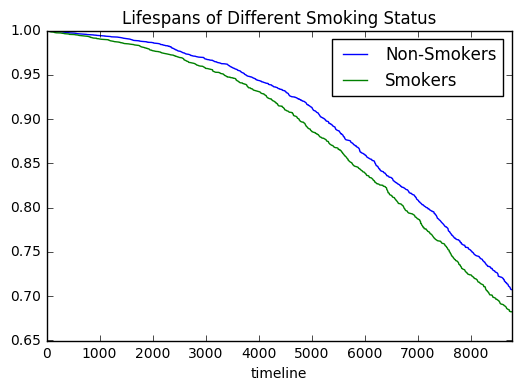

In [11]:
ax = plt.subplot(111)
non_kmf.survival_function_.plot(ax=ax)
smkr_kmf.survival_function_.plot(ax=ax)

plt.title('Lifespans of Different Smoking Status')
plt.show()

Smokers have a shorter lifetime for a given duration compared to the Non-Smokers group. This suggests that the Smokers group are have a higher probability to pass. For example at time t = 8000 days since the Baseline exam, the Smokers group have an approximately 0.75 probability that death does not occur and they survive past this time point. Whereas, the Non-Smokers group have an approximately 0.80 probability.

### Hazard Rate (`λ(t)`)
Probability of the event (death) happening in the next instant/ In other words, the fraction of people alive until that time.

In [12]:
non_naf = NelsonAalenFitter()
non_naf.fit(non['timedth'], event_observed=non['death'], label=['Non-Smokers'])

<lifelines.NelsonAalenFitter: fitted with 6598 observations, 4668 censored>

In [13]:
smkr_naf = NelsonAalenFitter()
smkr_naf.fit(smkr['timedth'], event_observed=smkr['death'], label=['Smokers'])

<lifelines.NelsonAalenFitter: fitted with 5029 observations, 3432 censored>

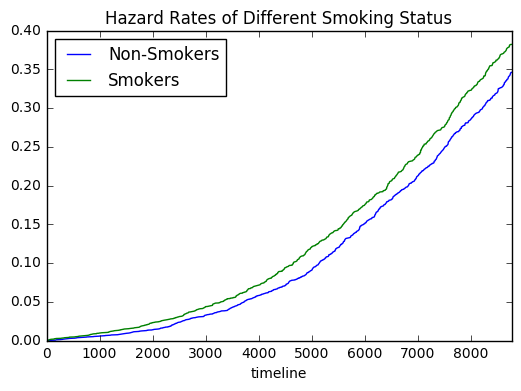

In [14]:
ax = plt.subplot(111)
non_naf.cumulative_hazard_.plot(ax=ax)
smkr_naf.cumulative_hazard_.plot(ax=ax)

plt.title('Hazard Rates of Different Smoking Status')
plt.show()

The Hazard Function illustrates that the Smokers group have a higher probability of the event (death) occuring  for a given duration compared to the Non-Smokers group. The Hazard curve is much steeper for the Smokers group.

### Significance Test
Hypothesis test determining if the differences in survival rates between Non-Smokers and Smokers group are statistically significantly different.

##### Hypothesis
  * **H<sub>0</sub>**: There survival rates of non-smokers and smokers are not statistically significantly different.
  * **H<sub>A</sub>**: There survival rates of non-smokers and smokers are statistically significantly different.

In [15]:
non_T = non['timedth']
smkr_T = smkr['timedth']
non_E = non['death']
smkr_E = smkr['death']

cursmke_summary = logrank_test(non_T, smkr_T, non_E, smkr_E)
cursmke_summary

<lifelines.StatisticalResult: 
Results
   df: 1
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00155 |             10.015 |      Reject Null    |        True       
>

#### Conclusion
The p-value is small (p-val < 0.05), providing substantial evidence against the null hypothesis. Hence, the null hypothesis is rejected in favor of the null hypothesis.

There is a statistically significant difference between the survival rates of the two cohorts (Non-Smokers and Smokers). 

The Smokers cohort appear to have a natural  bias towards the event (death). The group has a steeper survival curve, demonstrating that they have lower probability of surviving compared to the Non-Smoker group for a given duration.